In [1]:
#Pleas First run This Cell And Then import your data in The Next Cell
def test (X_test, t_test, D = 150): 
    
    # Import libraries:
    import numpy as np
    import numpy.random as npr
    import sys
    import pandas as pd
    import tensorflow as tf
    from tensorflow import keras
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('seaborn')
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics import classification_report
    import cv2
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.ensemble import RandomForestClassifier
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
    from keras.preprocessing.image import ImageDataGenerator
    from keras.callbacks import ReduceLROnPlateau
    from keras.layers import Conv2D, MaxPooling2D
    import warnings
    warnings.filterwarnings("ignore")
    
    
    X_test = X_test.T
    
    ## Reshape:
    X_test.shape, t_test.shape
    from skimage.transform import resize
    X_test_reshape = []

    D = 150
    for i in range(len(X_test)):
        X_test_reshape.append(resize((X_test[i].reshape(300,300,3)),(D,D,3)))
    X_test_reshape = np.asanyarray(X_test_reshape)
    del X_test
    

    x= X_test_reshape
    t= t_test
## Load Model:
    model_load = keras.models.load_model("ECE_saved_model.md")
    
    score= model_load.evaluate(x, t)
    print('The error is: %.2f%%'%(100-score[1]*100))
    
    ev = model_load.evaluate(x, t)
    print('validation loss:', ev[0])
    print('validation accuracy:', ev[1])
    
    
    predictions = model_load.predict(x)
    classes = np.argmax(predictions,axis = 1)
    
    
    # Classification report:
    print(classification_report(t,classes))
     
    # confusion matrix: 
    cm = confusion_matrix(t,classes)
    print(cm)
    
    plt.figure(figsize = (15,9))
    con_mtx = pd.DataFrame(data = cm)
    sns.heatmap(con_mtx, fmt = 'd', annot = True)
    plt.show()

2023-04-25 23:27:43.623270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 23:27:44.074997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-04-25 23:27:52.380503: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-04-25 23:27:53.399332: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-04-25 23:27:53.569422: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited

 15/117 [==>...........................] - ETA: 1s - loss: 0.2715 - accuracy: 0.9542

2023-04-25 23:27:54.645050: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


117/117 [==============================] - 5s 14ms/step - loss: 0.3618 - accuracy: 0.9448
The error is: 5.52%
117/117 [==============================] - 1s 12ms/step - loss: 0.3618 - accuracy: 0.9448
validation loss: 0.3618164360523224
validation accuracy: 0.9448480010032654
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       376
         1.0       0.93      0.90      0.92       372
         2.0       0.96      0.96      0.96       372
         3.0       0.96      0.94      0.95       371
         4.0       0.93      0.97      0.95       372
         5.0       0.96      0.96      0.96       374
         6.0       0.95      0.94      0.94       365
         7.0       0.94      0.95      0.94       366
         8.0       0.96      0.96      0.96       373
         9.0       0.92      0.93      0.92       376

    accuracy                           0.94      3717
   macro avg       0.95      0.94      0.94      3717
weighted avg       0

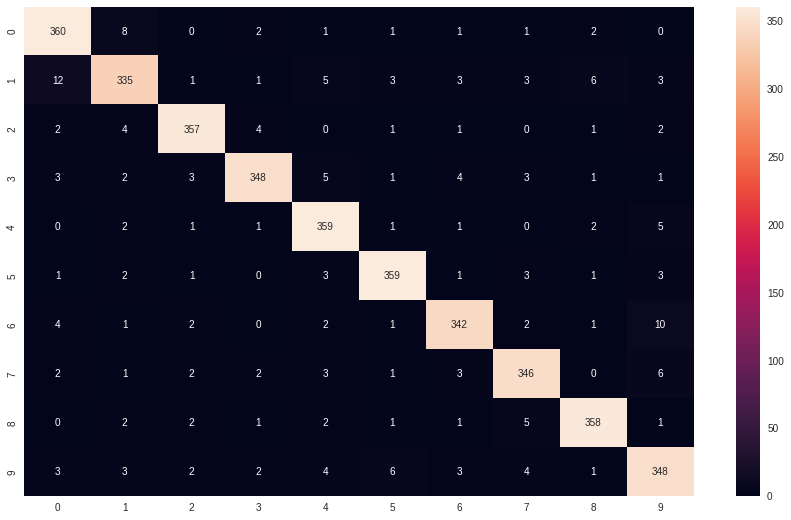

In [2]:
import numpy as np

X_t = np.load('--------YOUR-X-TEST-----.npy')
t_t = np.load('--------YOUR-LABLES------.npy')

test (X_t, t_t, D = 150)